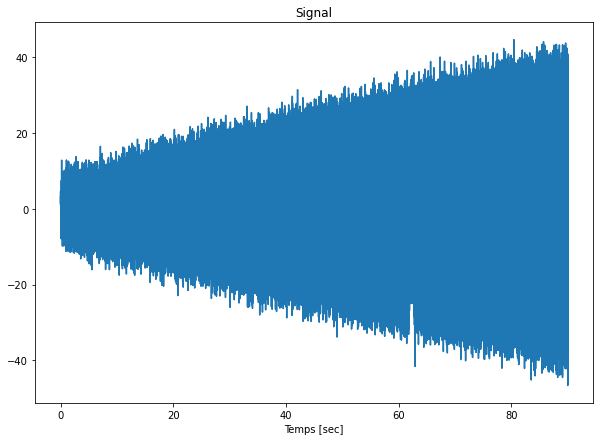

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import pywt

sign=np.fromfile('signal_enregistre.dat')

fs = 250 #frequence d'echantillonage
time = np.linspace(0, 90, len(sign)) 

plt.figure(figsize=(10,7))
plt.plot(time, sign)
plt.xlabel('Temps [sec]')
plt.title('Signal')
plt.show()

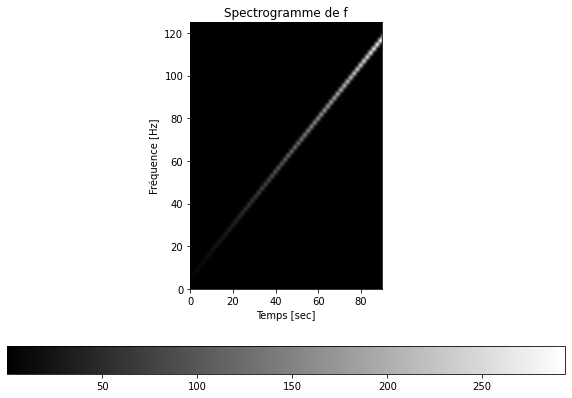

In [4]:
#Question 2 : le spectrogramme
largeur = 128
window = signal.windows.hamming(largeur) # fc nulle ne dehort d'un ceratin inrval --> zoumer sur une partie d'un signal
noverlap = largeur//8 
f, t, Sxx = signal.spectrogram(sign, fs=fs, window = window, noverlap = noverlap) #intencité de frequence de chaque temps
plt.figure(figsize=(10,7))
plt.imshow(Sxx, extent = [time[0], time[-1], np.max(f), np.min(f)], cmap='gray', interpolation = 'bilinear', vmin=Sxx.min(), vmax=Sxx.max())
plt.gca().invert_yaxis()
plt.ylabel('Fréquence [Hz]')
plt.xlabel('Temps [sec]')
plt.title('Spectrogramme de f')
plt.colorbar(orientation = 'horizontal')
plt.show()

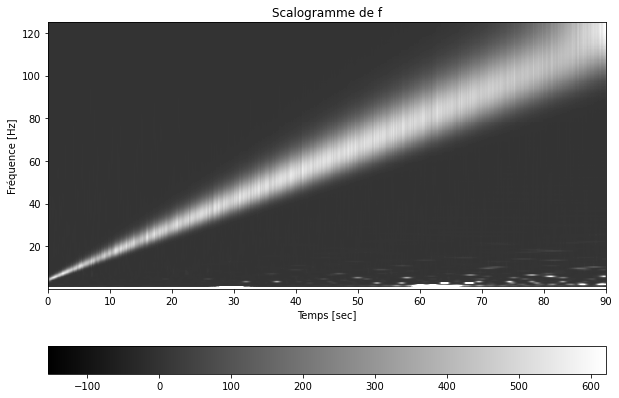

In [11]:
#question 3 : scalogramme
wt = pywt.ContinuousWavelet('cmor2-1')

p_min=0.0001
p_max=0.99
fact_min = -0.25

scale_min = 1
p_min=0.0001
p_max=0.991
nb_scales = 200
scale_max = len(time)/2
fq_max=fs/2
fc=wt.center_frequency
fq_min = fc/scale_max*fs
freqs = np.linspace(fq_min,fq_max,nb_scales)
scales = fc*fs/freqs
coef, fre = pywt.cwt(sign, scales, wt, sampling_period = 1/fs)
plt.figure(figsize=(10,7))
coef2 = coef**2
cs = np.sort(abs(coef2), axis = None)
#dis_min = cs[int(len(cs)*p_min)]
dis_max = cs[int(len(cs)*p_max)]
dis_min = dis_max * fact_min
plt.imshow(abs(coef2), extent = [time[0], time[-1], np.max(fre), np.min(fre)],cmap='gray',
interpolation = 'bilinear', vmin=dis_min, vmax=dis_max, aspect='auto')
plt.gca().invert_yaxis()
plt.ylabel('Fréquence [Hz]')
plt.xlabel('Temps [sec]')
plt.title('Scalogramme de f')
plt.colorbar(orientation = 'horizontal')
plt.show()

In [21]:
#Question 5
# pour voir quel modèle approche le mieux notre signal, on trace la courbe de f et de g
# et on la compare avec celle de sign

f= (time+10)**0.8*np.cos(0.03*time**3+25*time+np.pi/3)
g= (time+10)**0.8*np.cos(4*time**2+25*time+np.pi/3)

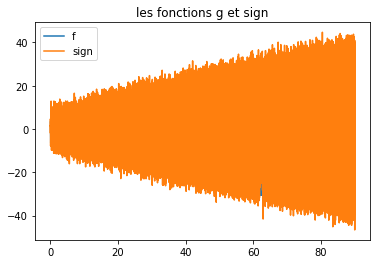

In [20]:
p = plt.plot(time, g, time, sign)
plt.title('les fonctions g et sign')
plt.legend((p[0], p[1]), ('g', 'sign'))
plt.show() 

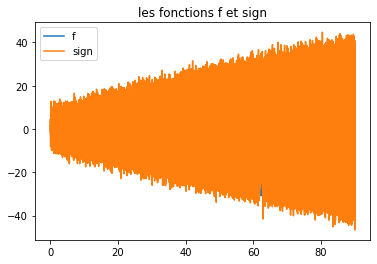

In [22]:
p = plt.plot(time, f, time, sign)
plt.title('les fonctions f et sign')
plt.legend((p[0], p[1]), ('f', 'sign'))
plt.show() 

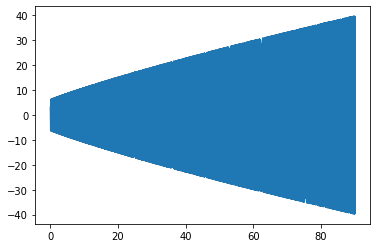

In [18]:
plt.plot(time, g)

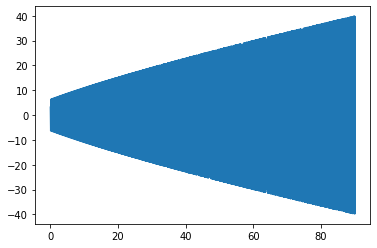

In [19]:
plt.plot(time, f)

In [27]:
#on peut aussi calculer l'erreur d'approximation
err_f = np.mean((f-sign)**2)
err_g = np.mean((g-sign)**2)

print('erreur approximation de f est :', err_f ,'\n', 'erreur approximation de g est :', err_g)

erreur approximation de f est : 672.237151717323 
 erreur approximation de g est : 707.4215061323198


on peut dire que l'erreur d'approximation par g est supperieure à l'erreur d'approximation pas f. 